In [4]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [6]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

model = DummyClassifier(strategy="most_frequent")
scores = cross_validate(model, data, target, cv=10)

In [11]:
import pandas as pd

cv = pd.DataFrame(scores)
print(cv["test_score"].mean())

0.7620540540540539


In [15]:
modelb = DummyClassifier(strategy="most_frequent")
scoresb = cross_validate(model, data, target, cv=10, 
                        scoring="balanced_accuracy")

cvb = pd.DataFrame(scores)
print(cvb)
print(cvb["test_score"].mean())

   fit_time  score_time  test_score
0  0.001042    0.000361     0.76000
1  0.000706    0.000294     0.76000
2  0.000694    0.000290     0.76000
3  0.000695    0.000291     0.76000
4  0.000688    0.000289     0.76000
5  0.000682    0.000286     0.76000
6  0.000688    0.000291     0.76000
7  0.000679    0.000286     0.76000
8  0.000670    0.000283     0.77027
9  0.000669    0.000283     0.77027
0.7620540540540539


In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

preprocessor = StandardScaler()

model = make_pipeline(preprocessor, KNeighborsClassifier())
scores = cross_validate(model, data, target, scoring="accuracy", cv=10,
                       return_train_score=True)
cvs = pd.DataFrame(scores)

print(model[1].n_neighbors)
print(cvs)
print(model.get_params())

5
   fit_time  score_time  test_score  train_score
0  0.004036    0.003364    0.373333     0.842496
1  0.003348    0.003156    0.400000     0.815750
2  0.003312    0.003162    0.560000     0.805349
3  0.003304    0.003150    0.706667     0.827637
4  0.003299    0.003161    0.733333     0.820208
5  0.003356    0.003391    0.760000     0.827637
6  0.003341    0.003210    0.680000     0.821694
7  0.003342    0.003227    0.786667     0.812779
8  0.003351    0.003205    0.743243     0.821958
9  0.003378    0.003182    0.783784     0.817507
{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'kneighborsclassifier': KNeighborsClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__leaf_size': 30, 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclas

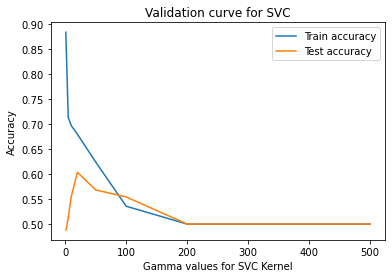

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

preprocessor = StandardScaler()
params = [1, 2, 5, 10, 20, 50, 100, 200, 500]
model = make_pipeline(preprocessor, KNeighborsClassifier())

train_scores, test_scores = validation_curve(
    model, data, target, param_name="kneighborsclassifier__n_neighbors", 
    param_range=params, cv=5, scoring="balanced_accuracy")

plt.plot(params, train_scores.mean(axis=1), label="Train accuracy")
plt.plot(params, test_scores.mean(axis=1), label="Test accuracy")
plt.legend()

plt.xlabel("Gamma values for SVC Kernel")
plt.ylabel("Accuracy")
_ = plt.title("Validation curve for SVC")
